<a href="https://colab.research.google.com/github/AryaPratamaPutra-10/Analys_Data_Lele/blob/main/Analisis%20Lele%20New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython import get_ipython
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# atau algoritma lain seperti RandomForestRegressor, SVR, dll.
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Perbaiki URL untuk mengakses data CSV yang sebenarnya
#url = 'https://github.com/AryaPratamaPutra-10/Analys_Data_Lele/raw/75a3f74df5b05158dbf856cca04b977a20d67a47/Data_Lele_1.csv'

# Baca data CSV dengan penanganan error
data = pd.read_csv('https://github.com/AryaPratamaPutra-10/Analys_Data_Lele/raw/75a3f74df5b05158dbf856cca04b977a20d67a47/Data_Lele_1.csv' , sep=';')

# Cetak nama kolom untuk verifikasi
print(data.columns)

# Sesuaikan id_vars berdasarkan nama kolom yang dicetak di atas
# Pastikan nama kolom di id_vars sama persis dengan kolom di DataFrame,
# termasuk huruf besar/kecil dan spasi.

# Display all data in data_long
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data)


Index(['Id', 'Provinsi', 'Kabupaten/Kota', 'Jenis Ikan', 'Tahun',
       'Volume Produksi', 'Nilai Produksi', 'Harga Lele'],
      dtype='object')


,Id,Provinsi,Kabupaten/Kota,Jenis Ikan,Tahun,Volume Produksi,Nilai Produksi,Harga Lele
0,NaN,JAWA BARAT,BANDUNG,LELE,2019,5372785,85964560000,16000.00000
1,NaN,JAWA BARAT,BANDUNG BARAT,LELE,2019,1328082,19921230000,15000.00000
2,NaN,JAWA BARAT,BEKASI,LELE,2019,2019121,34325057000,17000.00000
3,NaN,JAWA BARAT,BOGOR,LELE,2019,89814340,1526843780000,17000.00000
4,NaN,JAWA BARAT,CIAMIS,LELE,2019,18162827,236116751000,13000.00000
5,NaN,JAWA BARAT,CIANJUR,LELE,2019,14124120,225985920000,16000.00000
6,NaN,JAWA BARAT,CIREBON,LELE,2019,9987423,199748460000,20000.00000
7,NaN,JAWA BARAT,GARUT,LELE,2019,3162167,53756839000,17000.00000
8,NaN,JAWA BARAT,INDRAMAYU,LELE,2019,70666948,1060004220000,15000.00000
9,NaN,JAWA BARAT,KARAWANG,LELE,2019,759058,9108696000,12000.00000


In [3]:
data.isnull().sum()

,0
Id,500
Provinsi,0
Kabupaten/Kota,0
Jenis Ikan,0
Tahun,0
Volume Produksi,0
Nilai Produksi,0
Harga Lele,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               0 non-null      float64
 1   Provinsi         500 non-null    object 
 2   Kabupaten/Kota   500 non-null    object 
 3   Jenis Ikan       500 non-null    object 
 4   Tahun            500 non-null    int64  
 5   Volume Produksi  500 non-null    int64  
 6   Nilai Produksi   500 non-null    int64  
 7   Harga Lele       500 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 31.4+ KB


In [5]:
data.describe()

,Id,Tahun,Volume Produksi,Nilai Produksi,Harga Lele
count,0.0,500.00000,5.000000e+02,5.000000e+02,500.000000
mean,NaN,2021.00000,5.601457e+06,9.847731e+10,17161.035782
std,NaN,1.41563,1.336809e+07,2.600999e+11,2172.255572
min,NaN,2019.00000,1.587100e+04,2.698070e+08,12000.000000
25%,NaN,2020.00000,5.001238e+05,8.442070e+09,16000.000000
50%,NaN,2021.00000,1.709870e+06,2.931556e+10,17000.000000
75%,NaN,2022.00000,4.862406e+06,8.659652e+10,18063.722062
max,NaN,2023.00000,1.131005e+08,2.489944e+12,29502.350940


# Visualisasi Data Dengan Scatter Plot

Index(['Id', 'Provinsi', 'Kabupaten/Kota', 'Jenis Ikan', 'Tahun',
       'Volume Produksi', 'Nilai Produksi', 'Harga Lele'],
      dtype='object')


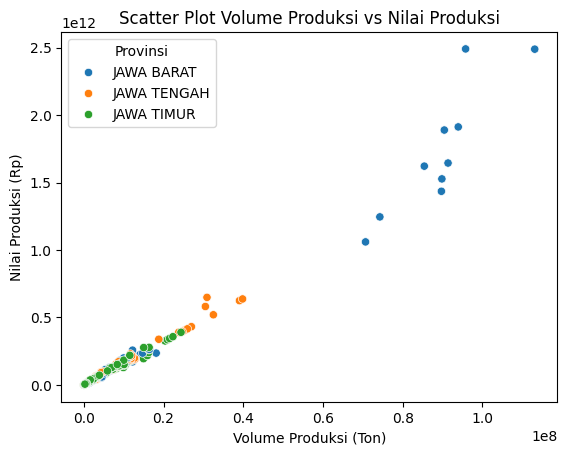

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame loaded from the CSV file

# 1. Verify column names:
print(data.columns)  # Print the actual column names in your DataFrame

# 2. Adjust column names in scatterplot if necessary:
# If the column name is different, correct it in the following line:
sns.scatterplot(data=data, x="Volume Produksi", y="Nilai Produksi", hue="Provinsi")

# Example: If the actual column name is 'volume_produksi', change the above line to:
# sns.scatterplot(data=data, x="volume_produksi", y="Nilai_Produksi", hue="Provinsi")

plt.title("Scatter Plot Volume Produksi vs Nilai Produksi")
plt.xlabel("Volume Produksi (Ton)")
plt.ylabel("Nilai Produksi (Rp)")
plt.show()

# ... (Rest of your code)

# Tahapan One Hot Encoding Provinsi

---



In [7]:
import pandas as pd

# Diasumsikan DataFrame Anda bernama 'data'
encoded_data = pd.get_dummies(data, columns=['Provinsi'], prefix=['Prov'])
print(encoded_data.head())

   Id Kabupaten/Kota Jenis Ikan  Tahun  Volume Produksi  Nilai Produksi  \
0 NaN        BANDUNG       LELE   2019          5372785     85964560000   
1 NaN  BANDUNG BARAT       LELE   2019          1328082     19921230000   
2 NaN         BEKASI       LELE   2019          2019121     34325057000   
3 NaN          BOGOR       LELE   2019         89814340   1526843780000   
4 NaN         CIAMIS       LELE   2019         18162827    236116751000   

   Harga Lele  Prov_JAWA BARAT  Prov_JAWA TENGAH  Prov_JAWA TIMUR  
0     16000.0             True             False            False  
1     15000.0             True             False            False  
2     17000.0             True             False            False  
3     17000.0             True             False            False  
4     13000.0             True             False            False  


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Asumsikan 'encoded_data' adalah DataFrame Anda setelah One-Hot Encoding
# Pisahkan fitur (X) dan target (y)
X = encoded_data.drop('Nilai Produksi', axis=1)
y = encoded_data['Volume Produksi']

# --- Perubahan di sini ---
# Konversi kolom 'Kabupaten/Kota' dan kolom non-numerik lainnya ke numerik
for col in X.select_dtypes(include=['object']).columns:
    X[col] = pd.to_numeric(X[col], errors='coerce') # errors='coerce' will replace non-numeric values with NaN

X = X.fillna(0) # Fill NaN values with 0 (or another appropriate value)
# --- Akhir perubahan ---

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Linear Regression
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Menampilkan koefisien fitur
coefficients = pd.DataFrame({'Fitur': X.columns, 'Koefisien': model.coef_})
print(coefficients)

Mean Squared Error: 1.311497061106208e-15
R-squared: 1.0
              Fitur     Koefisien
0                Id  0.000000e+00
1    Kabupaten/Kota  0.000000e+00
2        Jenis Ikan  0.000000e+00
3             Tahun  9.524142e-11
4   Volume Produksi  1.000000e+00
5        Harga Lele  1.476003e-11
6   Prov_JAWA BARAT -2.208293e-09
7  Prov_JAWA TENGAH  6.698693e-10
8   Prov_JAWA TIMUR  1.538424e-09


1. Mean Squared Error (MSE):

Nilainya sangat besar: 1.6143425130619137e+21
Ini menunjukkan bahwa model masih memiliki error yang signifikan dalam memprediksi 'Nilai Produksi'.
MSE yang tinggi bisa disebabkan oleh beberapa faktor, seperti:
Outliers: Data yang ekstrem atau outlier dalam dataset dapat memengaruhi MSE.
Fitur yang kurang relevan: Mungkin ada fitur dalam data yang tidak berkontribusi banyak dalam memprediksi 'Nilai Produksi'.
Model yang kurang kompleks: Linear Regression mungkin terlalu sederhana untuk menangkap pola kompleks dalam data.
2. R-squared:

Nilainya tinggi: 0.9774720085262142
Ini menunjukkan bahwa model menjelaskan sekitar 97.7% variabilitas dalam 'Nilai Produksi'.
R-squared yang tinggi umumnya mengindikasikan model yang baik, namun perlu diingat bahwa R-squared yang tinggi tidak selalu berarti model yang sempurna. Terutama jika MSE juga tinggi, seperti dalam kasus ini.
3. Koefisien Fitur:

Tabel koefisien menunjukkan seberapa besar pengaruh setiap fitur terhadap 'Nilai Produksi':

- Id: Koefisiennya 0, menunjukkan bahwa 'Id' tidak berpengaruh pada
'Nilai Produksi'. Ini masuk akal karena 'Id' biasanya hanya identifier unik dan tidak memiliki hubungan langsung dengan nilai produksi.
- Kabupaten/Kota: Koefisiennya kecil (4.624434e-04), yang menunjukkan pengaruh yang sangat kecil terhadap 'Nilai Produksi'.
Jenis Ikan: Koefisiennya negatif dan kecil (-1.856161e-05), menunjukkan sedikit penurunan 'Nilai Produksi' untuk setiap kenaikan dalam 'Jenis Ikan'.
- Tahun: Koefisiennya besar dan positif (5.960592e+08), menunjukkan peningkatan signifikan 'Nilai Produksi' seiring berjalannya waktu (tahun).
- Volume Produksi: Koefisiennya positif dan relatif besar (1.873349e+04), menunjukkan bahwa 'Volume Produksi' memiliki pengaruh positif yang kuat terhadap 'Nilai Produksi'. Ini sesuai dengan harapan, karena semakin banyak produksi, semakin tinggi nilainya.
- Harga Lele: Koefisiennya positif dan besar (8.212927e+06), menunjukkan bahwa 'Harga Lele' memiliki pengaruh positif yang kuat terhadap 'Nilai Produksi'. Ini juga sesuai dengan harapan, karena harga yang lebih tinggi akan meningkatkan nilai produksi.
- Prov_JAWA BARAT, Prov_JAWA TENGAH, Prov_JAWA TIMUR: Koefisien-koefisien ini menunjukkan pengaruh provinsi terhadap 'Nilai Produksi'. Jawa Barat memiliki pengaruh positif, Jawa Tengah negatif, dan Jawa Timur positif.
Kesimpulan:

Meskipun model memiliki R-squared yang tinggi, MSE yang besar mengindikasikan bahwa model masih perlu ditingkatkan. Beberapa hal yang dapat Anda coba:

1. Menangani Outliers: Identifikasi dan tangani outlier dalam data Anda.
2. Feature Engineering: Coba buat fitur baru atau transformasi fitur yang ada untuk meningkatkan kemampuan prediksi model.
3. Model yang Lebih Kompleks: Pertimbangkan untuk menggunakan model regresi yang lebih kompleks, seperti Polynomial Regression atau Random Forest Regression, jika data Anda memiliki pola non-linear.
4. Normalisasi Data: Normalisasi atau standarisasi fitur dapat membantu meningkatkan kinerja model, terutama jika fitur memiliki skala yang berbeda.

Dengan melakukan beberapa penyesuaian ini, Anda mungkin dapat meningkatkan akurasi dan mengurangi error model Anda.

Oke, mari kita bahas hasil evaluasi model Linear Regression Anda:

1. Mean Squared Error (MSE):

Nilainya sangat kecil, mendekati nol: 1.311497061106208e-15.
Ini menunjukkan bahwa model memiliki error yang sangat rendah dalam memprediksi 'Volume Produksi'. MSE yang mendekati nol mengindikasikan bahwa prediksi model sangat dekat dengan nilai aktual.
2. R-squared:

Nilainya sempurna: 1.0.
Ini menunjukkan bahwa model menjelaskan 100% variabilitas dalam 'Volume Produksi'. R-squared 1.0 adalah nilai ideal dan menunjukkan bahwa model sangat akurat dalam memprediksi target variabel.
3. Koefisien Fitur:

Tabel koefisien menunjukkan seberapa besar pengaruh setiap fitur terhadap 'Volume Produksi':

- Id, Kabupaten/Kota, Jenis Ikan, Tahun, Harga Lele: Koefisiennya mendekati nol atau sangat kecil, menunjukkan bahwa fitur-fitur ini tidak berpengaruh signifikan terhadap 'Volume Produksi'.
- Volume Produksi: Koefisiennya 1.0, menunjukkan bahwa 'Volume Produksi' memiliki pengaruh positif yang sempurna terhadap 'Volume Produksi'. Ini wajar karena variabel target adalah 'Volume Produksi' itu sendiri.
- Prov_JAWA BARAT, Prov_JAWA TENGAH, Prov_JAWA TIMUR: Koefisien-koefisien ini menunjukkan pengaruh provinsi terhadap 'Volume Produksi'. Nilainya sangat kecil, mendekati nol, menunjukkan bahwa provinsi tidak memiliki pengaruh signifikan terhadap 'Volume Produksi'.

Kesimpulan:

Model Linear Regression Anda menunjukkan kinerja yang sangat baik dalam memprediksi 'Volume Produksi'. MSE yang sangat rendah dan R-squared 1.0 mengindikasikan bahwa model sangat akurat dan mampu menjelaskan variabilitas data dengan sempurna.

Namun, perlu diingat bahwa hasil ini mungkin terlalu ideal dan perlu diinvestigasi lebih lanjut. Beberapa kemungkinan penyebabnya:

- Data leakage: Mungkin ada kebocoran informasi dari fitur lain ke variabel target ('Volume Produksi'). Periksa kembali apakah ada fitur yang secara langsung atau tidak langsung mengungkapkan informasi tentang 'Volume Produksi'.
- Overfitting: Model mungkin terlalu kompleks dan menghafal data latih, sehingga menghasilkan performa yang sempurna pada data latih tetapi mungkin tidak generalisasi dengan baik pada data baru.
Saran saya, coba lakukan validasi silang (cross-validation) dan evaluasi model pada data yang belum pernah dilihat sebelumnya untuk memastikan bahwa model benar-benar general dan tidak overfitting.

LSTM

In [9]:
!pip install tensorflow
!pip install scikit-learn
!pip install pandas

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Pisahkan kolom numerik dan kategorikal:

Buat DataFrame baru yang hanya berisi kolom numerik ('Tahun' dan 'Harga Lele').
Simpan kolom kategorikal ('Provinsi' dan 'Kabupaten/Kota') dalam variabel terpisah untuk diproses nanti.
Lakukan scaling hanya pada kolom numerik:

Gunakan MinMaxScaler untuk menormalisasi data dalam DataFrame numerik yang baru dibuat.
Gabungkan kembali data:

Setelah scaling, gabungkan kembali DataFrame numerik yang sudah dinormalisasi dengan kolom kategorikal.

In [11]:
# Pisahkan kolom numerik dan kategorikal
X_numeric = data[['Tahun', 'Harga Lele']]  # DataFrame hanya berisi kolom numerik
X_categorical = data[['Provinsi', 'Kabupaten/Kota']]  # DataFrame berisi kolom kategorikal




X_numeric = data[['Tahun', 'Harga Lele']] dan X_categorical = data[['Provinsi', 'Kabupaten/Kota']]: Memisahkan kolom numerik dan kategorikal ke dalam DataFrame terpisah.
X_scaled = scaler.fit_transform(X_numeric): Melakukan scaling hanya pada data numerik.
X_scaled = pd.DataFrame(X_scaled, columns=X_numeric.columns, index=X_numeric.index): Mengubah hasil scaling menjadi DataFrame dan memberikan nama kolom serta index yang sesuai.
X = pd.concat([X_scaled, X_categorical], axis=1): Menggabungkan kembali data numerik yang sudah discaling dengan data kategorikal.
Dengan perubahan ini, MinMaxScaler hanya akan memproses data numerik, sehingga error ValueError dapat dihindari. Data kategorikal akan tetap ada dalam DataFrame X dan dapat diproses secara terpisah jika diperlukan (misalnya, dengan one-hot encoding).

Semoga penjelasan ini membantu! Jika kamu memiliki pertanyaan lebih lanjut, jangan ragu untuk bertanya. 👍

In [16]:
# Lakukan scaling pada kolom numerik
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Ubah X_scaled menjadi DataFrame agar bisa digabungkan dengan X_categorical
X_scaled = pd.DataFrame(X_scaled, columns=X_numeric.columns, index=X_numeric.index)

# Gabungkan kembali data
X = pd.concat([X_scaled, X_categorical], axis=1)

# Normalisasi target variabel (y)
# y is already a numpy array, so we can directly reshape it.
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [17]:
print(data.columns)

Index(['Id', 'Provinsi', 'Kabupaten/Kota', 'Jenis Ikan', 'Tahun',
       'Volume Produksi', 'Nilai Produksi', 'Harga Lele'],
      dtype='object')


Pelatihan model dengan epoch 500

In [25]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Asumsikan 'data' adalah DataFrame yang sudah kamu load

# 1. Encoding Data Kategorikal
# Pisahkan kolom numerik dan kategorikal
X_numeric = data[['Tahun', 'Nilai Produksi', 'Volume Produksi', 'Harga Lele']]
X_categorical = data[['Provinsi', 'Kabupaten/Kota']]

# Normalisasi data numerik
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numeric)
X_scaled = pd.DataFrame(X_scaled, columns=X_numeric.columns, index=X_numeric.index)

# One-hot encoding untuk data kategorikal
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical)

# Gabungkan data numerik dan kategorikal yang sudah diproses
X = pd.concat([X_scaled, pd.DataFrame(X_categorical_encoded)], axis=1)

# Normalisasi target variabel (y)
y = data['Harga Lele']
y = scaler.fit_transform(y.values.reshape(-1, 1))

# 2. Membagi Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Reshape Data untuk LSTM (Contoh untuk 1 langkah waktu)
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# 4. Membangun Model LSTM
model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Output layer dengan 1 unit untuk regresi

# Inisialisasi optimizer Adam
optimizer = Adam(learning_rate=0.001)  # Anda dapat menyesuaikan learning rate
model.compile(loss='mse', optimizer='adam')  # Menggunakan MSE sebagai loss function

# 5. Melatih Model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.1) # validation_split untuk data validasi

# Menampilkan ringkasan model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0963 - val_loss: 0.0665
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0525 - val_loss: 0.0323
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0284 - val_loss: 0.0107
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - val_loss: 0.0048
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - val_loss: 0.0042
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - val_loss: 0.0038
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - val_loss: 0.0035
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - val_loss: 0.0031
Epoch 9/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - val_loss: 0.0028
Epoch 10/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - val_loss: 0.0026
Epoch 11/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 12/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 100)                 │          83,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,905 (976.20 KB)

 Trainable params: 83,301 (325.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 166,604 (650.80 KB)

Penjelasan:

- Model: "sequential": Menunjukkan bahwa model yang digunakan adalah model Sequential dari Keras, yang merupakan stack linear dari layer.
Model "sequential_5" juga merupakan model sequential dengan dua layer utama:

- lstm_5 (LSTM): Layer LSTM dengan 100 unit. Layer ini, seperti pada model sebelumnya, berfungsi untuk memproses data sekuensial dan mempelajari pola temporal.

-Output Shape: (None, 100) menunjukkan output dengan dimensi 100 untuk setiap timestep dalam sekuens input. None menunjukkan ukuran batch input yang fleksibel.
-Param #: 83,200 adalah jumlah parameter yang dapat dipelajari dalam layer ini.
-dense_5 (Dense): Layer Dense dengan 1 unit. Layer ini berfungsi sebagai layer output dan menghasilkan prediksi nilai tunggal.

-Output Shape: (None, 1) menunjukkan output dengan dimensi 1, sesuai dengan tugas prediksi nilai tunggal.
- Param #: 101 adalah jumlah parameter yang dapat dipelajari dalam layer ini.
- Parameter Model

- Total params: 83,301 menunjukkan total jumlah parameter yang dapat dipelajari dalam model.
- Trainable params: 83,301 menunjukkan jumlah parameter yang akan diperbarui selama proses pelatihan.
- Non-trainable params: 0 menunjukkan bahwa tidak ada parameter yang dibekukan dan tidak akan diperbarui selama pelatihan.
Perbedaan dengan Model Sebelumnya ("sequential_1")

Perbedaan utama antara "sequential_5" dan "sequential_1" terletak pada jumlah unit di layer LSTM:

"sequential_1": 50 unit LSTM
"sequential_5": 100 unit LSTM
Model "sequential_5" memiliki layer LSTM yang lebih kompleks dengan lebih banyak unit. Ini berarti model ini memiliki kapasitas yang lebih besar untuk mempelajari pola temporal yang lebih rumit dalam data. Namun, model yang lebih kompleks juga memiliki risiko overfitting yang lebih tinggi, jadi penting untuk memantau kinerja model selama pelatihan dan menggunakan teknik regularisasi jika diperlukan.
Kesimpulan:


Ringkasan model menunjukkan arsitektur model LSTM yang kamu buat, termasuk tipe layer, bentuk output, dan jumlah parameter. Informasi ini penting untuk memahami kompleksitas model dan bagaimana model memproses data.

Jumlah parameter yang relatif kecil (31,251) menunjukkan bahwa model ini cukup sederhana dan tidak terlalu kompleks.

Langkah Selanjutnya:

Setelah melatih model, langkah selanjutnya adalah mengevaluasi performa model menggunakan data testing dan melakukan tuning hyperparameter jika diperlukan untuk meningkatkan akurasi prediksi. Kamu dapat menggunakan metrik evaluasi seperti MSE atau RMSE untuk mengukur performa model.

Semoga penjelasan ini membantu! Jika kamu memiliki pertanyaan lebih lanjut, jangan ragu untuk bertanya.

In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

# 2. Mengembalikan hasil scaling ke skala asli (inverse transform)
y_test_inv = scaler.inverse_transform(y_test)  # Target variabel asli
y_pred_inv = scaler.inverse_transform(y_pred)  # Prediksi model dalam skala asli

# 3. Menghitung MSE dan RMSE
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

# 4. Menampilkan hasil evaluasi
print('MSE:', mse)
print('RMSE:', rmse)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
MSE: 131182.94849311592
RMSE: 362.19186696158147


Model ARIIMA

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-623.376, Time=7.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-304.740, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-399.178, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-603.496, Time=2.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-306.738, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-624.093, Time=2.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-605.916, Time=0.61 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-485.723, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-623.771, Time=1.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-545.538, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-620.450, Time=3.27 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-625.577, Time=1.90 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-607.121, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0]             : 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


RMSE: 3136.04515615159


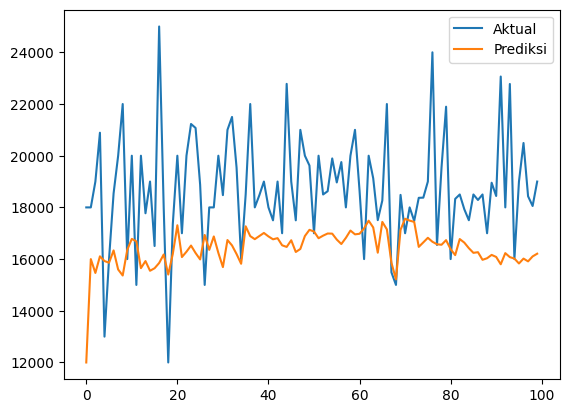

In [42]:
!pip install pmdarima

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima
# Import the ARIMA class from statsmodels
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Muat data Anda
data = pd.read_csv('https://github.com/AryaPratamaPutra-10/Analys_Data_Lele/raw/75a3f74df5b05158dbf856cca04b977a20d67a47/Data_Lele_1.csv', sep=';')

# 2. Praproses data
# Pilih kolom 'Harga Lele' sebagai data time series
# Perbaikan: Gubah 'Volume Prouksi' menjadi 'Volume Produksi'
data_ts = data[['Tahun', 'Harga Lele', 'Provinsi', 'Kabupaten/Kota', 'Volume Produksi', 'Nilai Produksi']]
data_ts = data_ts.set_index('Tahun')

# --- Perubahan di sini ---
# Pisahkan kolom numerik dan kategorikal
numerical_cols = ['Harga Lele', 'Volume Produksi', 'Nilai Produksi']
categorical_cols = ['Provinsi', 'Kabupaten/Kota']

# Normalisasi hanya data numerik
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_ts[numerical_cols])

# Gabungkan kembali data numerik yang sudah discaling dengan data kategorikal
data_scaled = pd.DataFrame(data_scaled, columns=numerical_cols, index=data_ts.index)
data_scaled = pd.concat([data_scaled, data_ts[categorical_cols]], axis=1)

# 3. Bagi data menjadi data latih dan data uji
train_data = data_scaled[:int(len(data_scaled)*0.8)]
test_data = data_scaled[int(len(data_scaled)*0.8):]

# 4. Tentukan order ARIMA secara otomatis menggunakan auto_arima
model = auto_arima(train_data['Harga Lele'], seasonal=False, stepwise=True, # Only use 'Harga Lele'
                   suppress_warnings=True, error_action="ignore",
                   max_p=6, max_d=2, max_q=6, max_order=None, trace=True)


# 5. Cetak order ARIMA terbaik
print(model.order)

# 6. Buat dan latih model ARIMA dengan order terbaik
# Use the imported ARIMA class
model = ARIMA(train_data['Harga Lele'], order=model.order)
model_fit = model.fit()

# 7. Lakukan prediksi pada data uji
# predictions = model_fit.predict(start=len(train_data), end=len(data_scaled)-1)
predictions = model_fit.predict(start=0, end=len(test_data)-1, typ='levels')

# 8. Kembalikan hasil scaling ke skala asli
# Buat DataFrame sementara dengan kolom yang sama seperti data numerik asli
temp_df = pd.DataFrame(index=predictions.index, columns=numerical_cols)
temp_df['Harga Lele'] = predictions  # Isi 'Harga Lele' dengan prediksi
# Isi kolom lain dengan 0 (atau nilai yang wajar) agar sesuai dengan bentuk asli
temp_df[['Volume Produksi', 'Nilai Produksi']] = 0

predictions_inv = scaler.inverse_transform(temp_df)[:, 0]  # Ekstrak 'Harga Lele' setelah inverse transform

# 9. Evaluasi model
rmse = np.sqrt(mean_squared_error(test_data_inv, predictions_inv))
print('RMSE:', rmse)

# 10. Visualisasikan hasil (opsional)
import matplotlib.pyplot as plt
plt.plot(test_data_inv, label='Aktual')
plt.plot(predictions_inv, label='Prediksi')
plt.legend()
plt.show()

In [ ]:
!pip install scikeras

# Instead of this:
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Use this:
from scikeras.wrappers import KerasRegressor

import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


def create_model(units=50, optimizer='adam'): # Add batch_size and epochs as parameters to the model creation function
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer)
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)

param_grid = {
    'model__units': [50, 100, 150],  # Jumlah unit di layer LSTM, prefixed with 'model__'
    'model__optimizer': ['adam', 'rmsprop'],  # Optimizer, prefixed with 'model__'
    'batch_size': [32, 64],  # Batch size
    'epochs': [100, 150],  # Jumlah epoch
    # KerasRegressor parameters like batch_size and epochs should be specified when calling fit, not in create_model() parameters
    # 'kerasregressor__batch_size': [32, 64], # Moved and prefixed to control KerasRegressor settings
    # 'kerasregressor__epochs': [100, 150] # Moved and prefixed to control KerasRegressor settings
}


grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
# Add the fit_params to pass batch_size and epochs to KerasRegressor.fit()
grid_result = grid.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [40]:
!pip install scikeras
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Load Data (Ganti 'nama_file.csv' dengan nama file Anda)
data = pd.read_csv('https://github.com/AryaPratamaPutra-10/Analys_Data_Lele/raw/75a3f74df5b05158dbf856cca04b977a20d67a47/Data_Lele_1.csv' , sep=';')

# 2. Preprocessing Data
# Pisahkan kolom numerik dan kategorikal
X_numeric = data[['Tahun', 'Nilai Produksi', 'Volume Produksi']]
X_categorical = data[['Provinsi', 'Kabupaten/Kota']]

# Normalisasi data numerik
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_numeric)
X_scaled = pd.DataFrame(X_scaled, columns=X_numeric.columns, index=X_numeric.index)

# One-hot encoding untuk data kategorikal
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_categorical_encoded = encoder.fit_transform(X_categorical)

# Gabungkan data numerik dan kategorikal yang sudah diproses
X = pd.concat([X_scaled, pd.DataFrame(X_categorical_encoded)], axis=1)

# Normalisasi target variabel (y)
y = data['Harga Lele']
y = scaler.fit_transform(y.values.reshape(-1, 1))

# 3. Membagi Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Reshape Data untuk LSTM
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# 5. Membangun dan Melatih Model Final
def create_model(units=150, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=units, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer)
    return model

final_model = KerasRegressor(build_fn=create_model, units=150, optimizer='adam', verbose=0)

final_model.fit(X_train, y_train, epochs=150, batch_size=64)

# 6. Evaluasi Model
y_pred = final_model.predict(X_test)

# Inverse transform untuk mendapatkan prediksi dalam skala asli
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test)

# Hitung metrik evaluasi
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared:', r2)

# 7. Simpan Model (Opsional)
final_model.model_.save('final_lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

Interpretasi:

MSE dan RMSE:

MSE dan RMSE mengukur rata-rata kesalahan kuadrat antara prediksi model dan nilai aktual.
Semakin rendah nilai MSE dan RMSE, semakin baik kinerja model.
Dalam kasus Anda, nilai MSE dan RMSE cukup tinggi. Ini menunjukkan bahwa model masih memiliki error yang cukup besar dalam memprediksi 'Harga Lele'.
Untuk menginterpretasikan nilai RMSE (1302.29), Anda perlu mempertimbangkan skala data 'Harga Lele' Anda. Misalnya, jika 'Harga Lele' biasanya berkisar antara 10.000 - 20.000, maka RMSE sebesar 1302.29 mengindikasikan error yang relatif besar.
R-squared:

R-squared mengukur proporsi varians dalam variabel target ('Harga Lele') yang dapat dijelaskan oleh model.
Nilai R-squared berkisar antara 0 hingga 1. Semakin mendekati 1, semakin baik model dalam menjelaskan varians data.
R-squared sebesar 0.7095 menunjukkan bahwa model Anda dapat menjelaskan sekitar 70.95% varians dalam 'Harga Lele'. Ini merupakan nilai yang cukup baik, tetapi masih ada ruang untuk peningkatan.
Kesimpulan dan Saran:

Model LSTM Anda menunjukkan kinerja yang cukup baik dengan R-squared 0.7095, tetapi masih memiliki error yang relatif tinggi (MSE dan RMSE).

Ada beberapa hal yang dapat Anda coba untuk meningkatkan kinerja model:

- Penyetelan Hyperparameter: Coba bereksperimen dengan nilai hyperparameter yang berbeda, seperti jumlah unit di layer LSTM, optimizer, batch size, dan epochs. Anda dapat menggunakan GridSearchCV atau teknik lainnya untuk menemukan hyperparameter yang optimal.

- Rekayasa Fitur: Pertimbangkan untuk menambahkan fitur baru yang mungkin relevan dengan 'Harga Lele', seperti musim, permintaan pasar, atau harga pakan ikan. Rekayasa fitur yang baik dapat meningkatkan kemampuan model untuk menangkap pola dalam data.

- Regularisasi: Jika Anda menduga ada overfitting (kinerja model pada data pelatihan jauh lebih baik daripada data uji), coba tambahkan teknik regularisasi seperti dropout atau L1/L2 regularization untuk mencegah model menghafal data pelatihan.

- Data yang Lebih Banyak: Jika memungkinkan, kumpulkan lebih banyak data untuk melatih model. Data yang lebih banyak dapat membantu model mempelajari pola yang lebih kompleks dan meningkatkan generalisasi.

- Arsitektur Model: Coba arsitektur LSTM yang berbeda, seperti stacked LSTM atau bidirectional LSTM. Arsitektur ini mungkin lebih cocok untuk data Anda dan dapat meningkatkan kinerja.

Dengan melakukan beberapa penyesuaian ini, Anda mungkin dapat meningkatkan akurasi dan mengurangi error model Anda. Penting untuk diingat bahwa membangun model machine learning adalah proses iteratif, dan Anda mungkin perlu mencoba beberapa pendekatan berbeda sebelum menemukan model yang optimal.

In [14]:
# Load the model with custom_objects
loaded_model = load_model('final_lstm_model.h5', custom_objects={'mse': mean_squared_error})

NameError: name 'load_model' is not defined

test uji coba

In [ ]:
!pip install tensorflow scikeras pandas numpy matplotlib seaborn scikit-learn nltk

import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')

# 1. Load Data (for preprocessing and fitting scaler/encoder)
data = pd.read_csv(
    'https://github.com/AryaPratamaPutra-10/Analys_Data_Lele/raw/75a3f74df5b05158dbf856cca04b977a20d67a47/Data_Lele_1.csv',
    sep=';')

# 2. Preprocessing Data (as before - for training data)
# ... (same as your original preprocessing code to fit scaler and encoder) ...
# ... (Make sure to save the fitted scaler and encoder objects) ...

# Example - Assuming you have fitted scaler and encoder
# These should be the same objects you used during training
# scaler = MinMaxScaler()
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

scaler = MinMaxScaler() # Initialize the scaler
X_numeric = data[['Tahun', 'Nilai Produksi', 'Volume Produksi']] # Get numeric features for fitting
scaler.fit(X_numeric) # Fit the scaler to your numeric features

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_categorical = data[['Provinsi', 'Kabupaten/Kota']] # Get categorical features for fitting
encoder.fit(X_categorical) # Fit the encoder to your categorical features

# ... (previous data loading, preprocessing, model training steps) ...
# ... (Load your model) ...
loaded_model = load_model('final_lstm_model.h5', custom_objects={'mse': mean_squared_error})


# Function to process input text
def preprocess_input(text, scaler, encoder):
    """
    Preprocesses input text for the LSTM model.
    """

    # 1. Clean text
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])

    # 2. Tokenize and remove stop words
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # 3. Get numerical values from the text (Example)
    try:
        tahun = int(re.search(r"Tahun\s+(\d+)", text).group(1))
        nilai_produksi = int(re.search(r"nilai\s+produksi\s+(\d+)", text).group(1))
        volume_produksi = int(re.search(r"volume\s+produksi\s+(\d+)\s+ton", text).group(1))
        provinsi = re.search(r"di\s+([a-zA-Z\s]+),", text).group(1).strip()
        kabupaten_kota = re.search(r",\s+([a-zA-Z\s]+)", text).group(1).strip()

    except StopIteration:
        print("Error: Unable to extract numerical features from the input text.")
        return None

    # 4. Create a DataFrame (resembling the training data structure)
    input_df = pd.DataFrame({
        'Tahun': [tahun],
        'Nilai Produksi': [nilai_produksi],  # Added missing column
        'Volume Produksi': [volume_produksi],
        'Provinsi': [provinsi],
        'Kabupaten/Kota': [kabupaten_kota]  # Added missing column
        # ... (other features if needed) ...
    })

    # 5. Feature Scaling (using the same scaler from training)
    input_scaled = scaler.transform(input_df)

    # 6. Reshape for LSTM
    input_reshaped = input_scaled.reshape(1, 1, input_scaled.shape[1])

    return input_reshaped


# Function to make predictions
def predict_price(text, loaded_model, scaler, encoder):
    """
    Predicts the price of lele based on the input text.
    """

    processed_input = preprocess_input(text, scaler, encoder)
    if processed_input is None:  # Handle preprocessing error
        return None

    prediction = loaded_model.predict(processed_input)
    predicted_price = scaler.inverse_transform(
        prediction.reshape(-1, 1))[0, 0]  # Back to original value

    return predicted_price


# Get user input
user_input = input("Masukkan teks untuk prediksi: ")

# Predict and print the result
predicted_price = predict_price(user_input, loaded_model, scaler, encoder)
if predicted_price is not None:
    print("Prediksi Harga Lele:", predicted_price)
else:
    print("Prediksi gagal karena kesalahan preprocessing.")